## Final Project Submission

Please fill out:
* Student name: Sylvia Muchiri.
* Student pace: self paced / part time / full time: full time
* Scheduled project review date/time: 9th July, 2023.
* Instructor name: Winnie Anyoso
* Blog post URL: 


##  HOUSING IN NORTHWESTERN COUNTY.

### 1. BUSINESS UNDERSTANDING.

#### a) Specifying The Data Analytics Question.
The data used in this analysis and the recommendations that come up can be used as a guide for people looking to buy houses in 
Northwester county. The findings will help guide customers on which are the best features to look at when considering buyng a house in the afore mentioned county.

#### b) Problem Statement.
What are the most important features to look for when seeking to buy a new home. Do renovations increase the price of a house? Is price dependent on the location? What aspects generally make a house more marketable?

#### c) Defining The Metric of Success.
This model will be considered a success if it can provide good recommendations that would help customers make good choices for houses and improve customer satisfaction with their choices. More than likely, these insights are all influenced ample knowledge following CRISPDM methodology.

The project will be considered a success if the R-squared is between 60-80% as well as looking at other metrics of success like mean absolute error, mean squared error, root mean squared error and the mean absolute percentage error.


#### d) Main Objective.
To find out which aspects of a house make it more marketable.

#### e) Specific Objectives.
a) Do renovations increase the value of a house.

b) Do any specific features play a role in the price of a house.

c) To find out what features are most important to consider when choosing a house.

#### f) Experimental Design.
. Data Collection: Importing the data needed.

. Read and check the data: using the necessary libraries to read the data

. Cleaning the data: Checking for null values and duplicates and dealing with them.

. Exploratory Data Analysis: Using univariate and bivariate analysis to see the correlations between the variables.

. Modeling : Building models that explore the relationships between the target variable and the independent variables.

. Regression results: Interpreting the results of the models to make insights on which are the best recommendations to customers.

. Conclusions: Drawing actionable insights from the results to be used to make decisions for the kinds of houses to buy.

#### g) Data Understading.
The dataset in this analysis is from:
. kc_house_data.csv

 Ample description of the columns and what they describe about the entire dataset is contained in:
 . column_names.md

. The data is about housing in King county.

. The data has both categorical and numeric data.

 


## 2. Importing Libraries.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats

## 3. Reading the Data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# columns to remove.
to_remove = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
                'sqft_lot15']
df = df.drop(columns = to_remove, axis =1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [6]:
df.shape

(21597, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


## 4. Data Wrangling.

### 4.1. Checking For Duplicates.

In [8]:
df.duplicated().any()

True

In [9]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [10]:
df['id'].duplicated().sum()

177

In [11]:
df = df.drop_duplicates(subset='id', keep='first')

In [12]:
df.duplicated().any()

False

### 4.2. Checking For Null Values

In [13]:
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2353
condition         0
grade             0
yr_built          0
dtype: int64

#### water front column is the only one with missing values and we have to find a way  to fill out the missing values 

In [14]:
# checking values that are in waterfront.
df['waterfront'].value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [15]:
# filling out the missing values with no since it is the most popular.
df['waterfront'] = df['waterfront'].fillna('NO')

In [16]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


## 5. Exploratory Data Analysis.

### 5.1. Univariate And Bivariate analyses of Numeric Columns.

In [18]:
# Identify the numeric columns
Numeric = ['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built']
Numeric

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built']

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'yr_built'}>, <Axes: >, <Axes: >]],
      dtype=object)

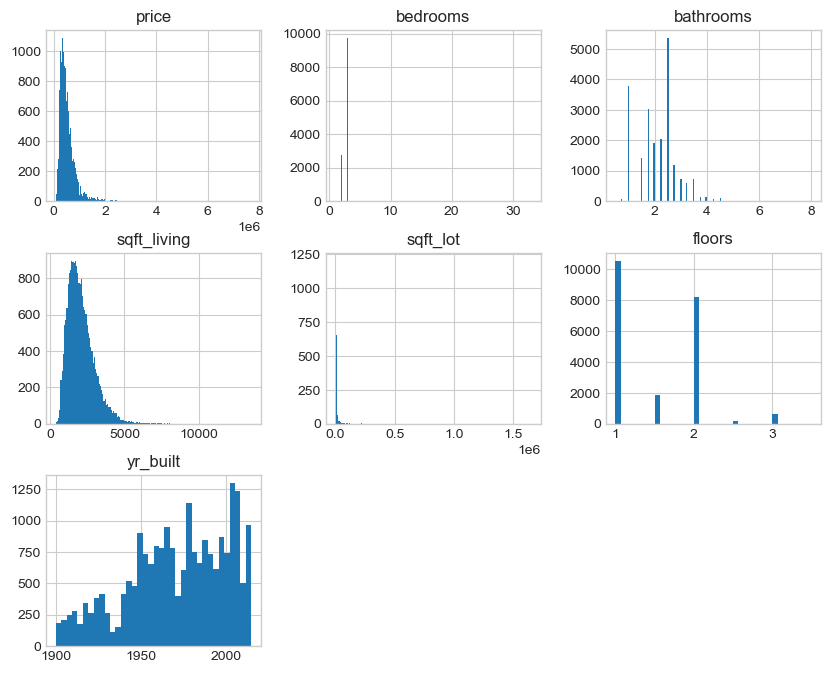

In [19]:
df[Numeric].hist(figsize = (10,8), bins = 'auto')

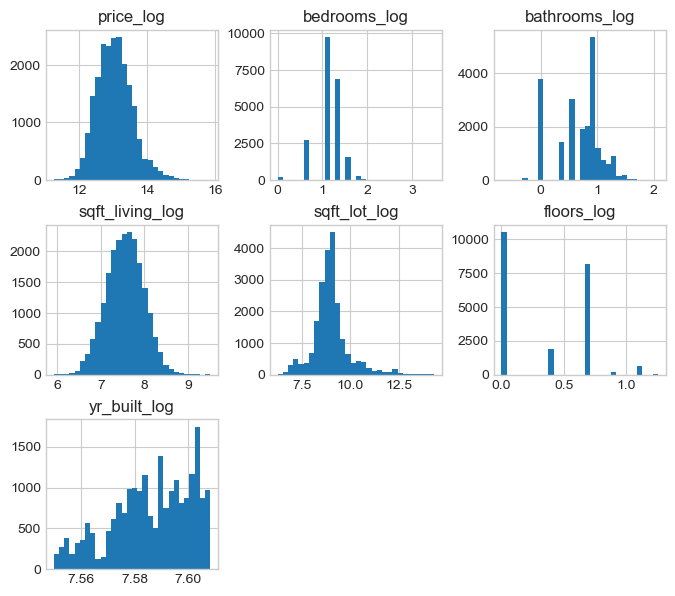

In [20]:
#Log transform and normalize
df_cont = df[Numeric]

#Log features
log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names

df_log.hist(figsize = (8,7), bins=30);

### 5.1.1 Checking for linearity.

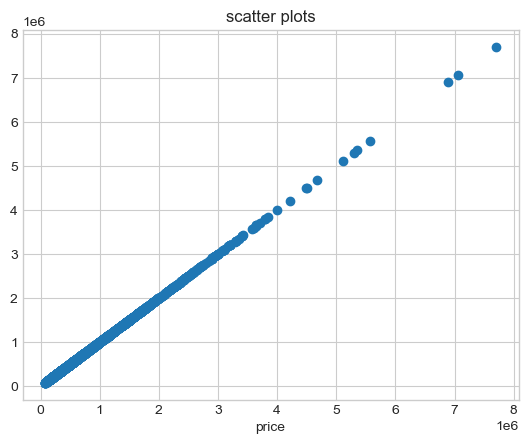

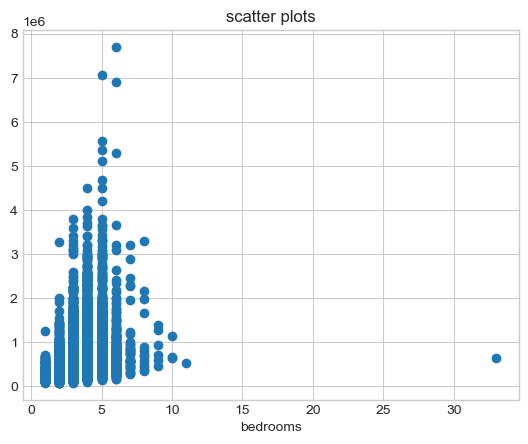

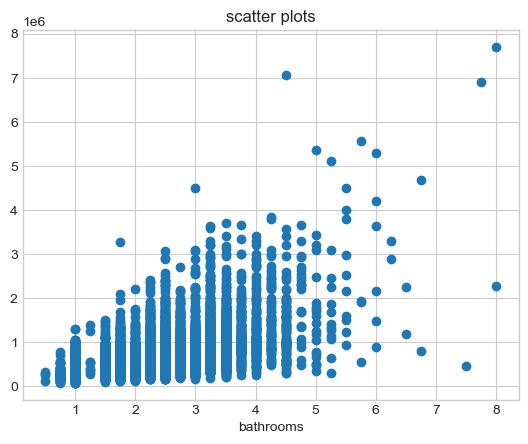

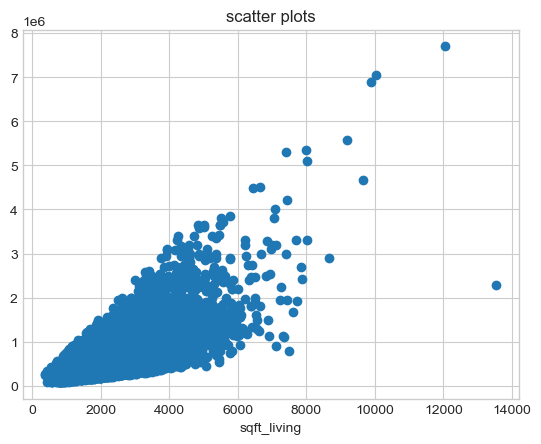

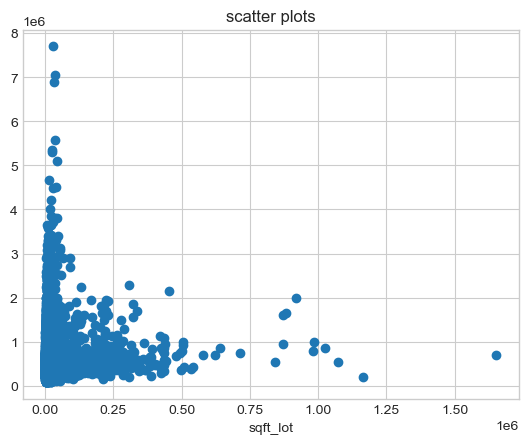

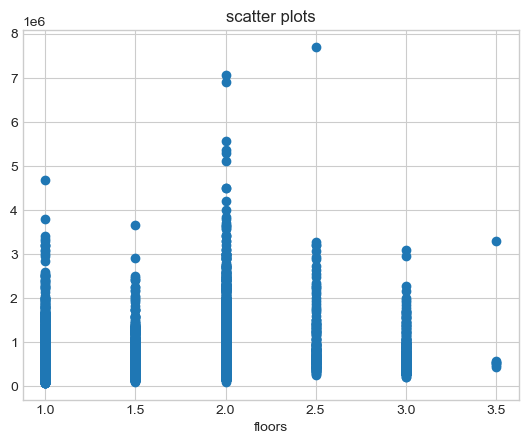

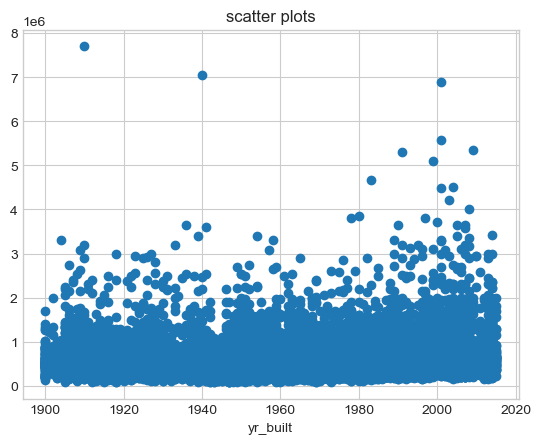

In [23]:
for column in Numeric:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(df[column], df['price'])
# set labels and title
    plt.xlabel(column)
    plt.title('scatter plots')
# display the plot.
    plt.show()
    

The variables that show an almost linear relationship are sqft_living and bathrooms the rest show a discontinous relationship between the target variable and the chosen variables.

### 5.1.2 Checking for outliers

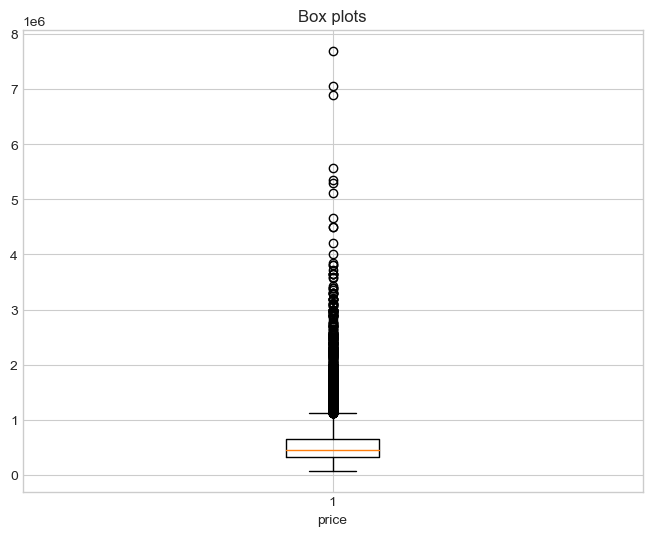

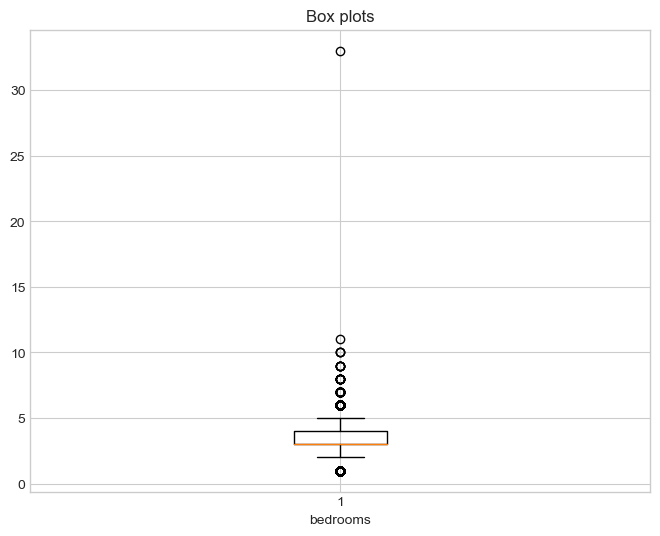

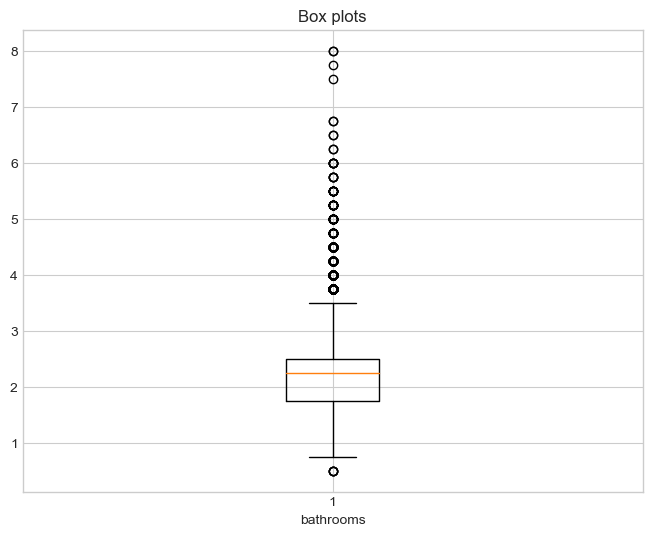

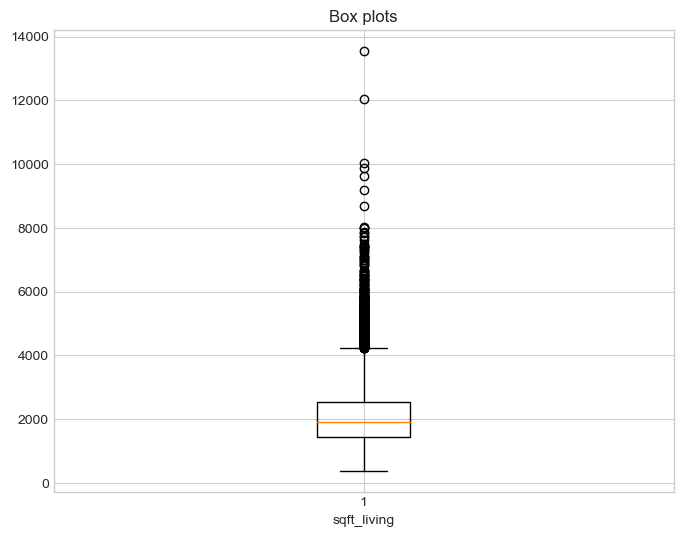

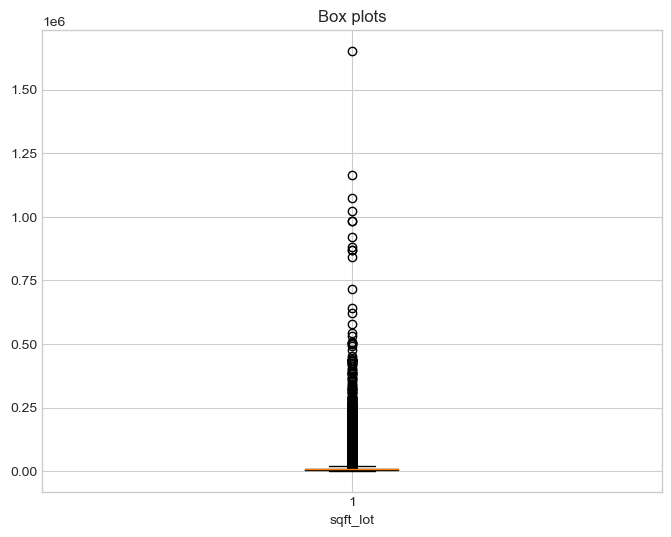

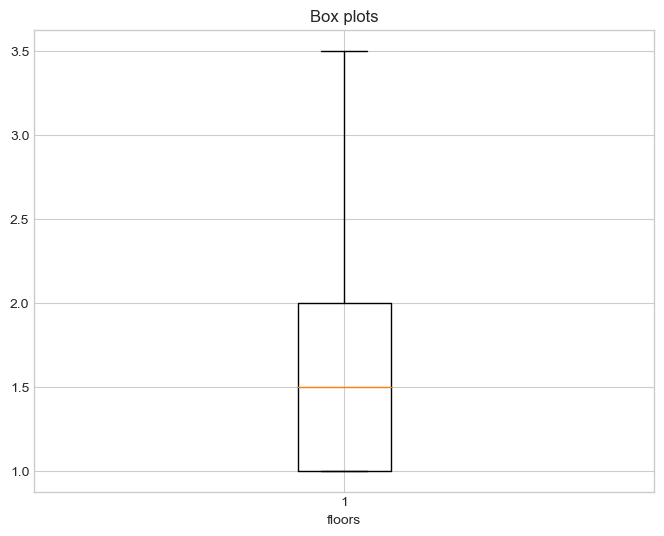

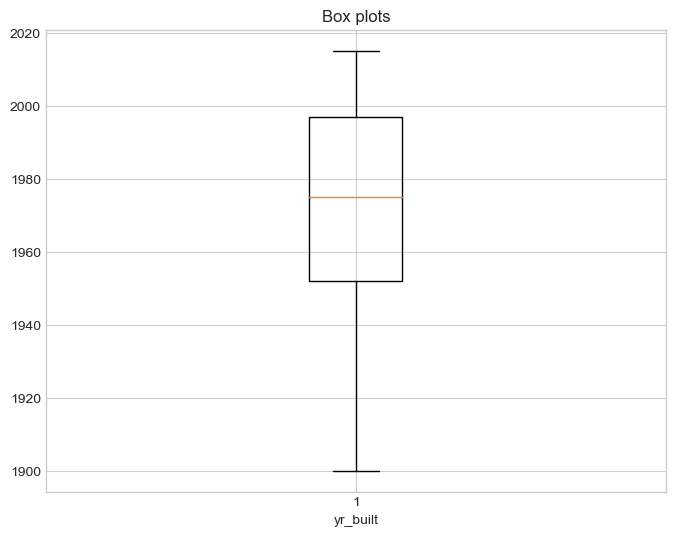

In [24]:
for column in Numeric:
    # plot the boxplots
    plt.figure(figsize = (8,6))
    plt.boxplot(df[column])
    # set the axes and title
    plt.xlabel(column)
    plt.title('Box plots')
    # display the plot
    plt.show()

The variables with outliers that could considerably skew our results include sqft_living, sqft_lot, bathrooms and bedrooms. Below we deal with the outliers to reduce their impact on the data.

In [25]:
# dealing with outliers
df['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
df.loc[df['bedrooms'] >= 7, 'bedrooms'] = '733'

In [27]:
df['bedrooms'].value_counts()

3      9731
4      6849
2      2736
5      1586
6       265
1       191
733      62
Name: bedrooms, dtype: int64

In [28]:
df['bathrooms'].value_counts()

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [29]:
# dealing with outliers for bathrooms.
df.loc[df['bathrooms']>=4.50 , 'bathrooms'] = 5.00

In [30]:
df['bathrooms'].value_counts()

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
5.00     186
3.75     155
4.00     134
4.25      79
0.75      70
1.25       9
0.50       4
Name: bathrooms, dtype: int64

In [31]:
# Calculate the z-scores for each data point in the "sqft_living" column
z_scores = (df['sqft_living'] - df['sqft_living'].mean()) / df['sqft_living'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 2

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_living'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_living'].value_counts())

9999    860
1300    136
1440    133
1400    132
1800    128
       ... 
3136      1
2115      1
2672      1
3176      1
1425      1
Name: sqft_living, Length: 770, dtype: int64


In [32]:
# Calculate the z-scores for each data point in the "sqft_living" column
z_scores = (df['sqft_lot'] - df['sqft_lot'].mean()) / df['sqft_lot'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 2

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_lot'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_lot'].value_counts())

9999     474
5000     355
6000     286
4000     249
7200     218
        ... 
67319      1
6453       1
11783      1
8189       1
1076       1
Name: sqft_lot, Length: 9415, dtype: int64


### 5.2. Univariate and Bivariate analysis for categorical columns.

In [33]:
Categorical = ['waterfront', 'condition', 'grade'] 

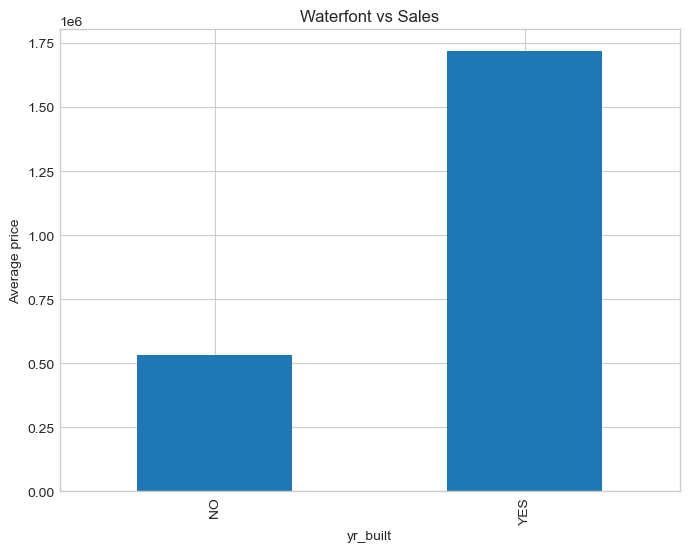

In [34]:
# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (8,6))
df.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

According to theplot above it is clear houses with waterfronts are most popular and sell the most.

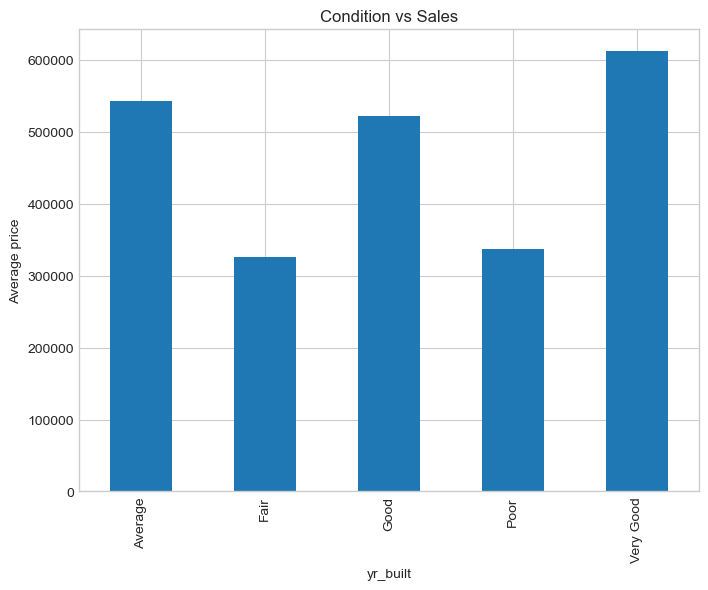

In [35]:
# How condition relates to saleprice
# plot the barplot
plt.figure(figsize = (8,6))
df.groupby('condition')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Condition vs Sales')

# display the plot
plt.show()

From the chart above we see that houses that are in good condition are the most popular and sell the most.

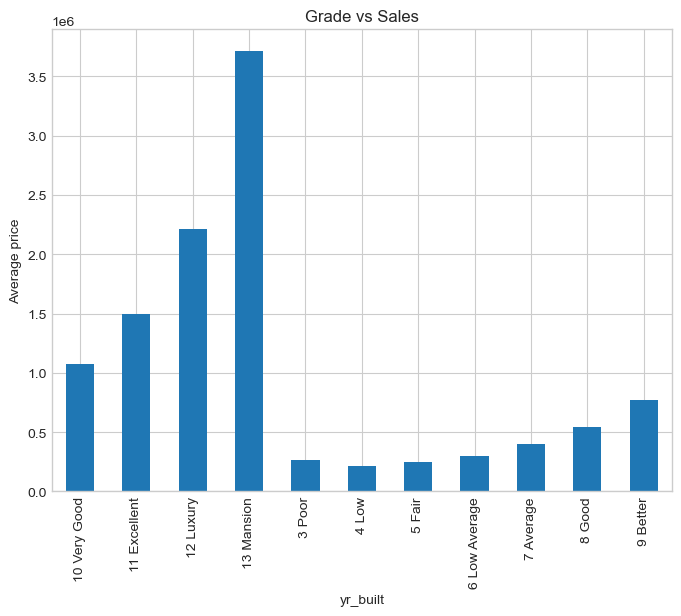

In [36]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (8,6))
df.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()

From the plot above it is clear that mansions are the most popular and are the hghest selling category.

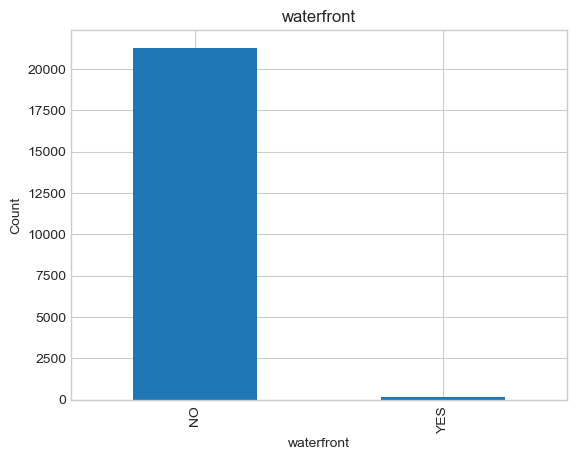

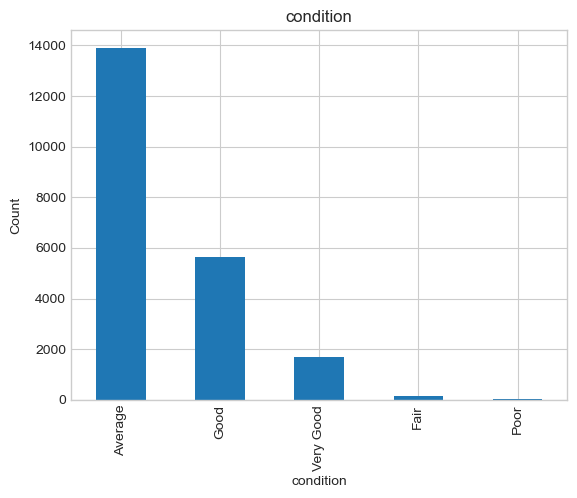

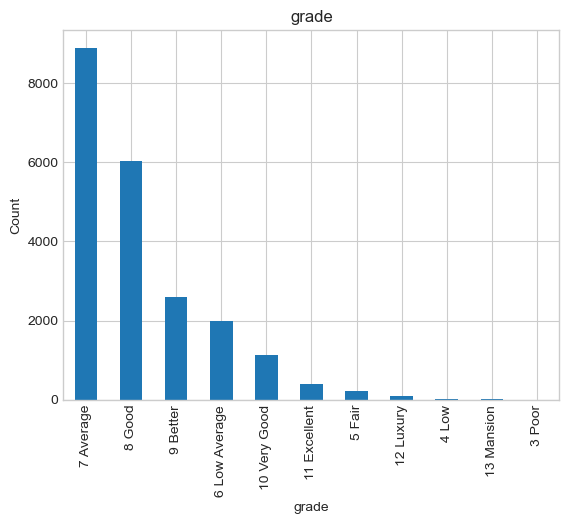

In [37]:
for column in Categorical:
    plt.figure()
    df[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

According to the plots above, houses with no water fronts are the most popular, Houses in average condition are the most popular and also houses rated 7(average) are the most popular.

### 5.3. One Hot Encoding.

In [38]:
# creating dummies to transform the categorical data to numeric.
df_all = pd.get_dummies(df, columns = Categorical, drop_first = True)
df_all

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,2004,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21420 non-null  int64  
 1   price                21420 non-null  float64
 2   bedrooms             21420 non-null  object 
 3   bathrooms            21420 non-null  float64
 4   sqft_living          21420 non-null  int64  
 5   sqft_lot             21420 non-null  int64  
 6   floors               21420 non-null  float64
 7   yr_built             21420 non-null  int64  
 8   waterfront_YES       21420 non-null  uint8  
 9   condition_Fair       21420 non-null  uint8  
 10  condition_Good       21420 non-null  uint8  
 11  condition_Poor       21420 non-null  uint8  
 12  condition_Very Good  21420 non-null  uint8  
 13  grade_11 Excellent   21420 non-null  uint8  
 14  grade_12 Luxury      21420 non-null  uint8  
 15  grade_13 Mansion     21420 non-null 

In [40]:
# selecting the features to use.
To_use = ['condition_Very Good', 'grade_13 Mansion', 'grade_8 Good', 'grade_9 Better', 'price', 'bedrooms','bathrooms',
          'sqft_living', 'sqft_lot', 'floors', 'yr_built']

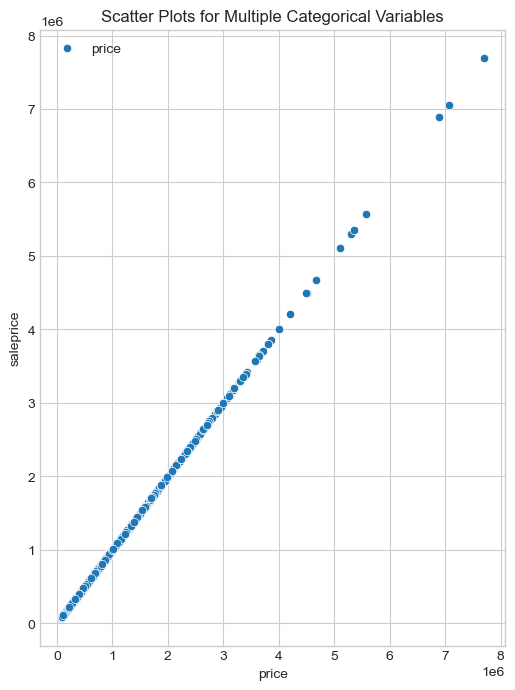

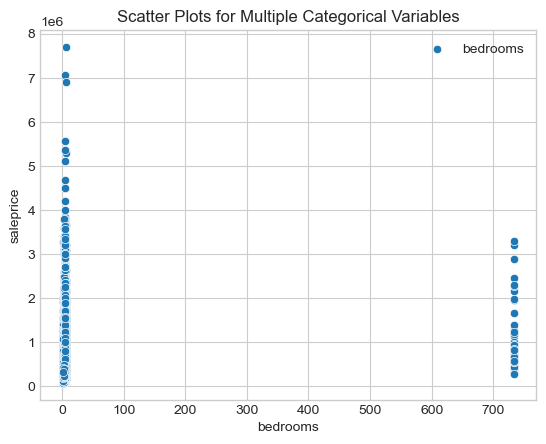

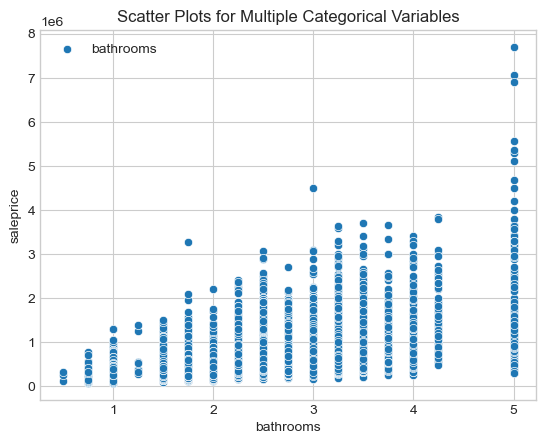

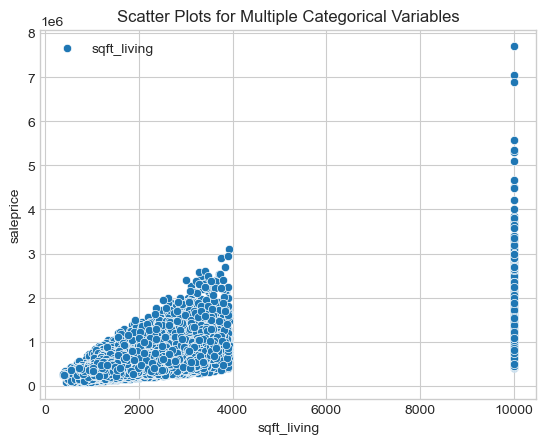

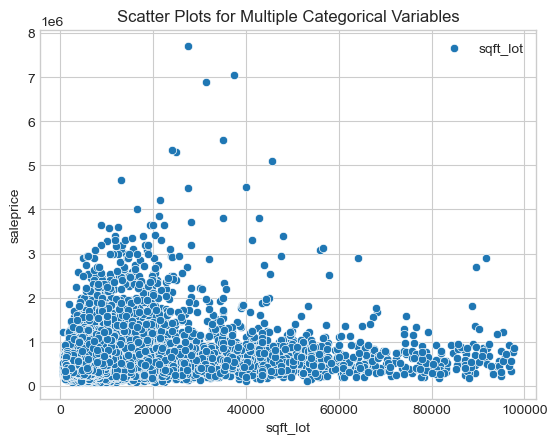

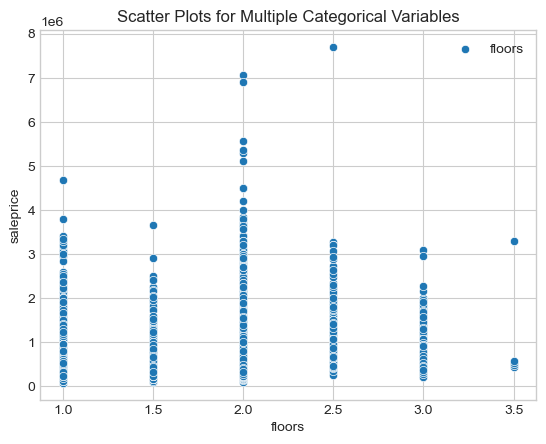

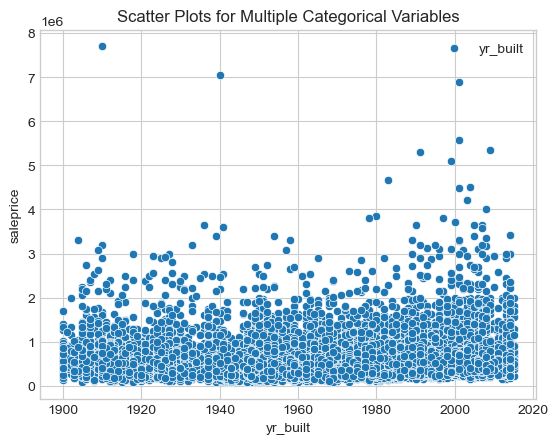

In [41]:
# plot scatter plots for each item in the recently transformed categorical list.    
plt.figure(figsize=(6, 8))
for column in df[Numeric]:
    sns.scatterplot(data=df_all[To_use], y=df['price'], x=column, label=column)
# set labels and title
    plt.ylabel('saleprice')
    plt.xlabel(column)
    plt.title('Scatter Plots for Multiple Categorical Variables')
# display the plot.
    plt.legend()
    plt.show()

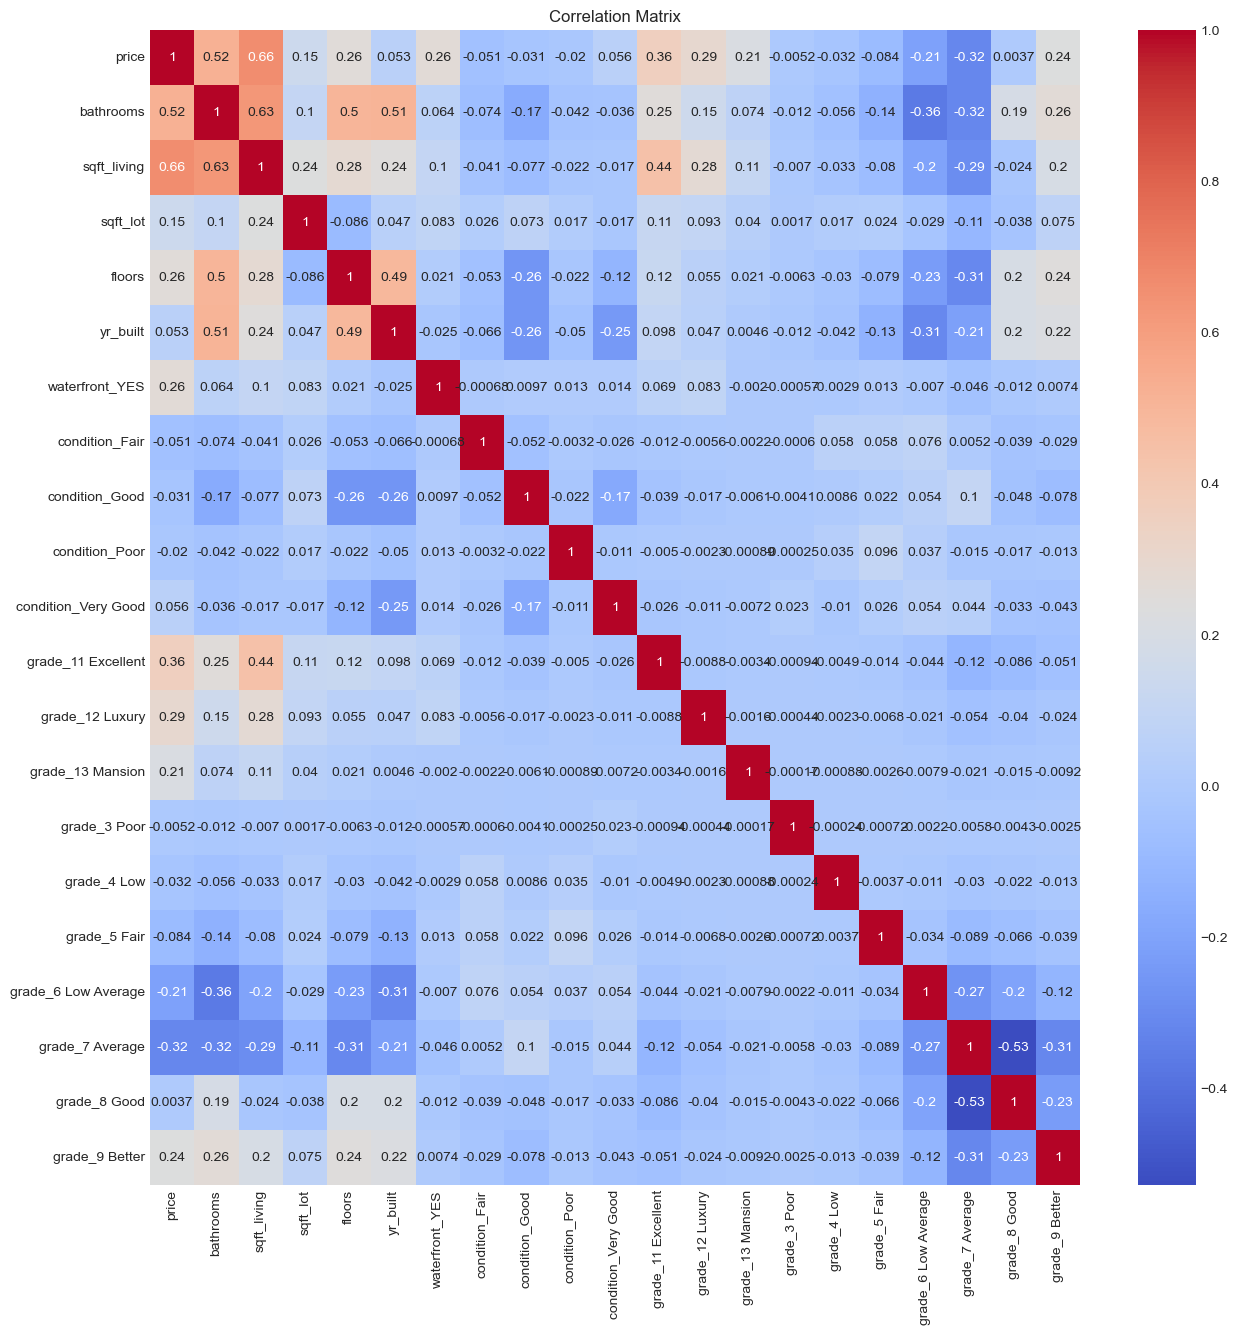

In [42]:
# Plotting a heatmap to show the correlation between the variables.
# Drop the unique identifier
df_all = df_all.drop(['id'], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_all.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

. correlation Provide insights into multicollinearity (high correlations between predictor variables) in statistical modeling, helping to identify redundant variables. They can also be useful for feature selection, identifying important variables for further analysis.

.  Variables with correlation coefficients close to 1 or -1 show high correlation, while coefficients close to 0 indicate a weak or no correlation.

. Variables that have a high positive correlation (dark red) indicate that they are directly proportional that is the increase or decrease at the same time. Concurrently, variables with a high negative correlation (dark blue) are inversely related that is one variable increases and the other decrease.

. Cells with darker shades indicates strong correlations with positive correlations being indicated by red colour while negative correlations being indicated by the blue colour.

. Each cell in the heat map shows the correlation between the variables and the target variable.

### 6) MODELLING.

#### BASELINE MODEL. 

In [43]:
# selecting the feature and target variables to use in the model.
X = df_all['sqft_living']
y = df_all['price']
# Constructing the model.
Baseline_model = sm.OLS(y, sm.add_constant(X))
# fitting the model.
Baseline_results = Baseline_model.fit()
# printing the summary results.
print(Baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:18:53   Log-Likelihood:            -2.9878e+05
No. Observations:               21420   AIC:                         5.976e+05
Df Residuals:                   21418   BIC:                         5.976e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.19e+05   3135.561     69.837      

. The model explains about 43.6% of the variance in sales which is not really a good fit for a model therefore it is important to build a model that takes up multiple variables to increase the variance.

. The model is statistically significant with a probability f_statistic below the alpha level of 0.05.

. The constant and floors are both statistically significant with a p_statistic of 0 which is below the alpha value.


#### MODEL 1.

In [44]:
# Selecting the feature and target variables to use in the model.
X = df_all[To_use].drop('price', axis = 1)
X

,condition_Very Good,grade_13 Mansion,grade_8 Good,grade_9 Better,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,0,0,0,0,3,1.00,1180,5650,1.0,1955
1,0,0,0,0,3,2.25,2570,7242,2.0,1951
2,0,0,0,0,2,1.00,770,10000,1.0,1933
3,1,0,0,0,4,3.00,1960,5000,1.0,1965
4,0,0,1,0,3,2.00,1680,8080,1.0,1987
...,...,...,...,...,...,...,...,...,...,...
21592,0,0,1,0,3,2.50,1530,1131,3.0,2009
21593,0,0,1,0,4,2.50,2310,5813,2.0,2014
21594,0,0,0,0,2,0.75,1020,1350,2.0,2009
21595,0,0,1,0,3,2.50,1600,2388,2.0,2004


In [45]:
y = df_all['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21420, dtype: float64

In [46]:
# import the relevant libraries.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print evaluarion metrics.
print('The mean absolute error is:', {mae})
print('The mean_squared error is:', {mse})
print('The root mean_squared error is:', {rmse})
print('The r_squared is:', {r2})
print('The mean absolute percentage error is:', {mape})

The mean absolute error is: {153352.6073863592}
The mean_squared error is: {57127602809.03634}
The root mean_squared error is: {239013.81300886426}
The r_squared is: {0.5282468900343114}
The mean absolute percentage error is: {32.712066260090374}


. The model explains about 52% in variance of the price
.The mean absolute percentage error is 32.71 which could reduce if the model improves.

#### MODEL 2.

In [48]:
# changing the datatype of bedrooms to float to be able to build a model.
df_all['bedrooms'] = df_all['bedrooms'].astype(float)

In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21420 non-null  float64
 1   bedrooms             21420 non-null  float64
 2   bathrooms            21420 non-null  float64
 3   sqft_living          21420 non-null  int64  
 4   sqft_lot             21420 non-null  int64  
 5   floors               21420 non-null  float64
 6   yr_built             21420 non-null  int64  
 7   waterfront_YES       21420 non-null  uint8  
 8   condition_Fair       21420 non-null  uint8  
 9   condition_Good       21420 non-null  uint8  
 10  condition_Poor       21420 non-null  uint8  
 11  condition_Very Good  21420 non-null  uint8  
 12  grade_11 Excellent   21420 non-null  uint8  
 13  grade_12 Luxury      21420 non-null  uint8  
 14  grade_13 Mansion     21420 non-null  uint8  
 15  grade_3 Poor         21420 non-null 

In [50]:
# defining X and y to build model.
X = df_all.drop(['price'], axis = 1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3.0,1.00,1180,5650,1.0,1955,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,2.25,2570,7242,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1.00,770,10000,1.0,1933,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.0,3.00,1960,5000,1.0,1965,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,2.00,1680,8080,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,2.50,1530,1131,3.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,4.0,2.50,2310,5813,2.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,2.0,0.75,1020,1350,2.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,3.0,2.50,1600,2388,2.0,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
y = df_all['price']

In [52]:
# building and fitting the model.
model_2 = sm.OLS(y, sm.add_constant(X))
# fitting the model.
model_2_results = model_2.fit()
# printing the summary of the results.
print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2009.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:20:44   Log-Likelihood:            -2.9324e+05
No. Observations:               21420   AIC:                         5.865e+05
Df Residuals:                   21398   BIC:                         5.867e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.634e+06   1

. Our model explains upto 66.3% of variance in prices.

. The model is statistically significant with a probability f-statsitic of 0.0

. Except for the condition poor and bedrooms the rest of the variables are statistically significant with a p-statistic lower than the alpha value of 0.05.


In [53]:
model_2_results.resid.abs()

0        106583.070614
1         12719.327247
2         95395.692052
3         62490.229949
4         69717.191823
             ...      
21592     84352.241225
21593     37594.198272
21594    265243.732412
21595     42119.187233
21596    184254.688928
Length: 21420, dtype: float64

In [54]:
mae = model_2_results.resid.abs().sum() / len(y)
mae

137177.02807798944

In [55]:
model_2_results.resid ** 2

0        1.135995e+10
1        1.617813e+08
2        9.100338e+09
3        3.905029e+09
4        4.860487e+09
             ...     
21592    7.115301e+09
21593    1.413324e+09
21594    7.035424e+10
21595    1.774026e+09
21596    3.394979e+10
Length: 21420, dtype: float64

In [56]:
rmse = ((model_2_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

213438.04365833435

The mean absolute error and the root mean squared error has reduced from the previous model which suggests that the model has improved.

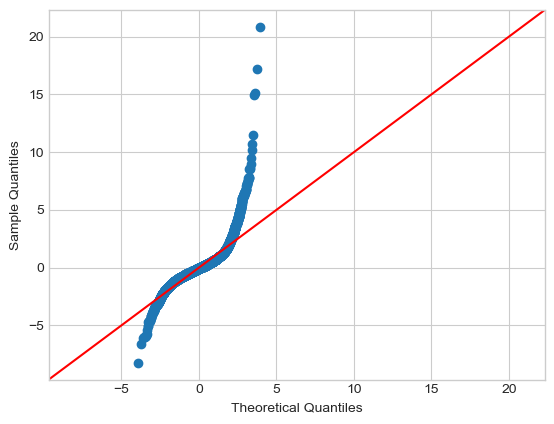

In [57]:
# plotting a qqplot to show if the plot follows the linear regression assumptions.
sm.graphics.qqplot(model_2_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

. The qqplot shows that some variables make the model to not assume normality indicating that there are some variables that are skewing our model.

### 7. MODELLING RESULTS.

. The simple model linear regression model explains 43.6% using only one independent variable against the target variable.

. The second model which is a multiple regression model explains about 52% of variance in price. This model uses 10 selected independent variables against the target variable.

. The final model takes in all the idependent variables against the target variable and explains about 66.3% of variance in the price of houses.

. All the models are statistically significant with a probability f-statistic of below the threshold alpha value of 0.05%.

. For the final model however, it takes in all the variables where others are more significant in making the model while others are not for example bedrooms and condition poor have a very high p statistic indicating that they are not really significant to the model.

. The mean squared error of the third model is the lowest showing an improvement from the previous model indicating better performance.

. The model features were selected on the basis of correlation which might have some bias thus making the model to not perform as effectively.

. The final model however did not indicate the model to be as normal as indicated by the qqplot.



### 8. CONCLUSIONS.

The model that explains the highest variance in sales was the final model that takes into account multiple independent variables inclusive of those selected. However, some variables like bedrooms and condition poor proved to be insignificant for the model since their p statistic values are above the alpha value of 0.05.

From the models above, it is important to be careful during feature selection in order to be aable to choose features that make a model perform exceptionally rather than optimally.

Square foot living and lot seemed to be significant when predicting the amount a house sells for also, if the condition is good and it has a waterfront the house seems to be selling for more. Thus when choosing a house clients should be keen on these features in order to make the right selection.

The final model was the best performing however it lacked some degree of normality which i think could be improved through transformations in order to make the model better performing.
